<a href="https://colab.research.google.com/github/saltandpurple/deeplearning-exercises/blob/main/fast_ai_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 26.8 MB/s 
     |████████████████████████████████| 5.5 MB 47.0 MB/s 
     |████████████████████████████████| 1.3 MB 40.3 MB/s 
     |████████████████████████████████| 441 kB 69.5 MB/s 
     |████████████████████████████████| 1.6 MB 47.1 MB/s 
     |████████████████████████████████| 212 kB 54.3 MB/s 
     |████████████████████████████████| 95 kB 5.4 MB/s 
     |████████████████████████████████| 163 kB 72.1 MB/s 
     |████████████████████████████████| 115 kB 75.8 MB/s 
     |████████████████████████████████| 127 kB 71.6 MB/s 
     |████████████████████████████████| 115 kB 74.1 MB/s 
     |████████████████████████████████| 7.6 MB 42.3 MB/s 
Mounted at /content/gdrive


In [9]:
tank_types = 'mbt','ifv','spaag'
path = Path('tanks')
if not path.exists():
    path.mkdir()
    for o in tank_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}', max_images=150)
        download_images(dest, urls=results)

In [10]:
fns = get_image_files(path)
failed = verify_images(fns)
failed
failed.map(Path.unlink);
len(failed)

0

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


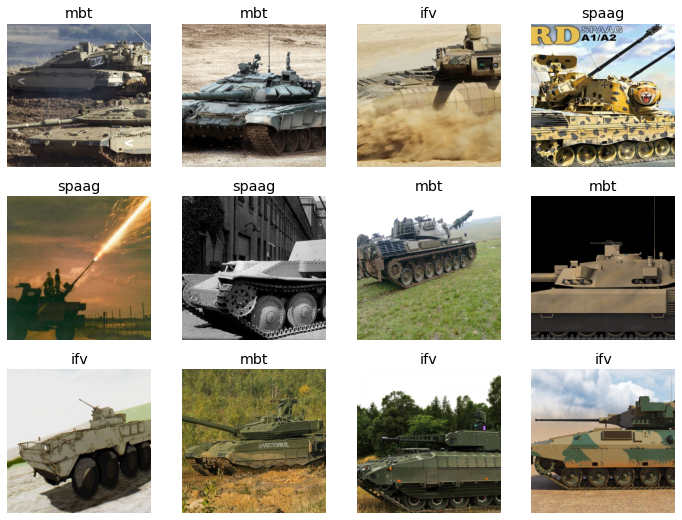

In [51]:
tanks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(400, min_scale=0.4),
    batch_tfms=aug_transforms
    )
dls = tanks.dataloaders(path)
dls.train.show_batch(max_n=12, nrows=3)



In [52]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.001689,0.917195,0.381579,00:14


epoch,train_loss,valid_loss,error_rate,time
0,1.358279,0.813461,0.394737,00:16
1,1.098554,0.683629,0.328947,00:15
2,0.937279,0.586972,0.276316,00:15
3,0.804874,0.544539,0.171053,00:15
4,0.673744,0.562577,0.184211,00:15
5,0.572680,0.593960,0.184211,00:16
6,0.491024,0.599343,0.157895,00:15
7,0.424218,0.588048,0.144737,00:15
8,0.372389,0.578619,0.144737,00:15
9,0.332115,0.572497,0.157895,00:15


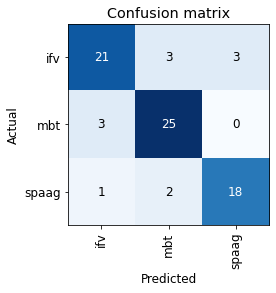

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

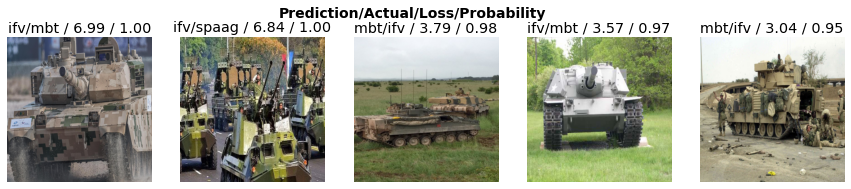

In [54]:
interp.plot_top_losses(5, nrows=1)

In [49]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [33]:
cleaner.delete()

(#6) [0,2,5,22,23,25]

In [50]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: ignored